In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [192]:
md = pd.read_csv('D:/it/cmf/hft/week1/md/md/btcusdt_Binance_LinearPerpetual/lobs.csv', nrows=30000)

In [193]:
md['receive_ts'] = pd.to_datetime(md['receive_ts'])

In [88]:
md['btcusdt:Binance:LinearPerpetual_ask_price_0'].describe()

count    30000.000000
mean     20047.762540
std         67.160038
min      19875.000000
25%      19992.900000
50%      20053.500000
75%      20092.000000
max      20199.700000
Name: btcusdt:Binance:LinearPerpetual_ask_price_0, dtype: float64

волатильность очень большая получается... 
получается, что с изменением inventory на 0.001, reservation price меняется на несколько долларов... это очень много. логично предположить, что изменение reservation price должно быть несколько центов... (10, например). поэтому разумным значением для волатильности кажется sigma [1, 10]

In [194]:
md.columns = [i.replace('btcusdt:Binance:LinearPerpetual_', '') for i in md.columns]

In [195]:
md['total_vol_ask'] = 0
md['total_vol_bid'] = 0
for i in range(10):
    md['total_vol_ask'] += md['ask_vol_' + str(i)]
    md['total_vol_bid'] += md['bid_vol_' + str(i)]

delta_p = c*np.log(Q)

In [198]:
c = []

In [199]:
for i in range(1, 25):
    delta_p = md['ask_price_0'][1000*i] - md['ask_price_0'][1000*i - 1000]
    delta_q = md['total_vol_bid'][1000*i] - md['total_vol_ask'][1000*i] + md['total_vol_bid'][1000*i-1000] - md['total_vol_ask'][1000*i-1000]
    current_c = abs(delta_p) / np.log(abs(delta_q)) 
    c.append(current_c)


In [200]:
c

[2.0949643254274664,
 0.27724109035246636,
 4.660364194011436,
 3.129294431547699,
 16.186392354863692,
 13.684795954007138,
 19.23900465106324,
 9.203131818419052,
 -19.51307731369716,
 8.958169776526585,
 34.402517801660395,
 5.838165805008033,
 21.34453086244535,
 8.954427581892531,
 3.8444561390726464,
 9.132722484472499,
 3.069144947230358,
 -53.14018973549739,
 5.218543186058656,
 8.649109230633698,
 1.8414216003573098,
 2.511056225160521,
 18.721557185606017,
 16.204291625894708]

очень как-то не подчиняется тому закону...

In [201]:
mean = 0
for x in c:
    mean+=x
mean = mean / len(c)

In [202]:
mean # = 1/K

6.0213348426048725

наше k = alpha/c, где альфа - степень в зависимости плотности Q. альфа примерно 1.5
получаем k = 0.25
на самом деле не совсем понятно, как адекватно к оценивать

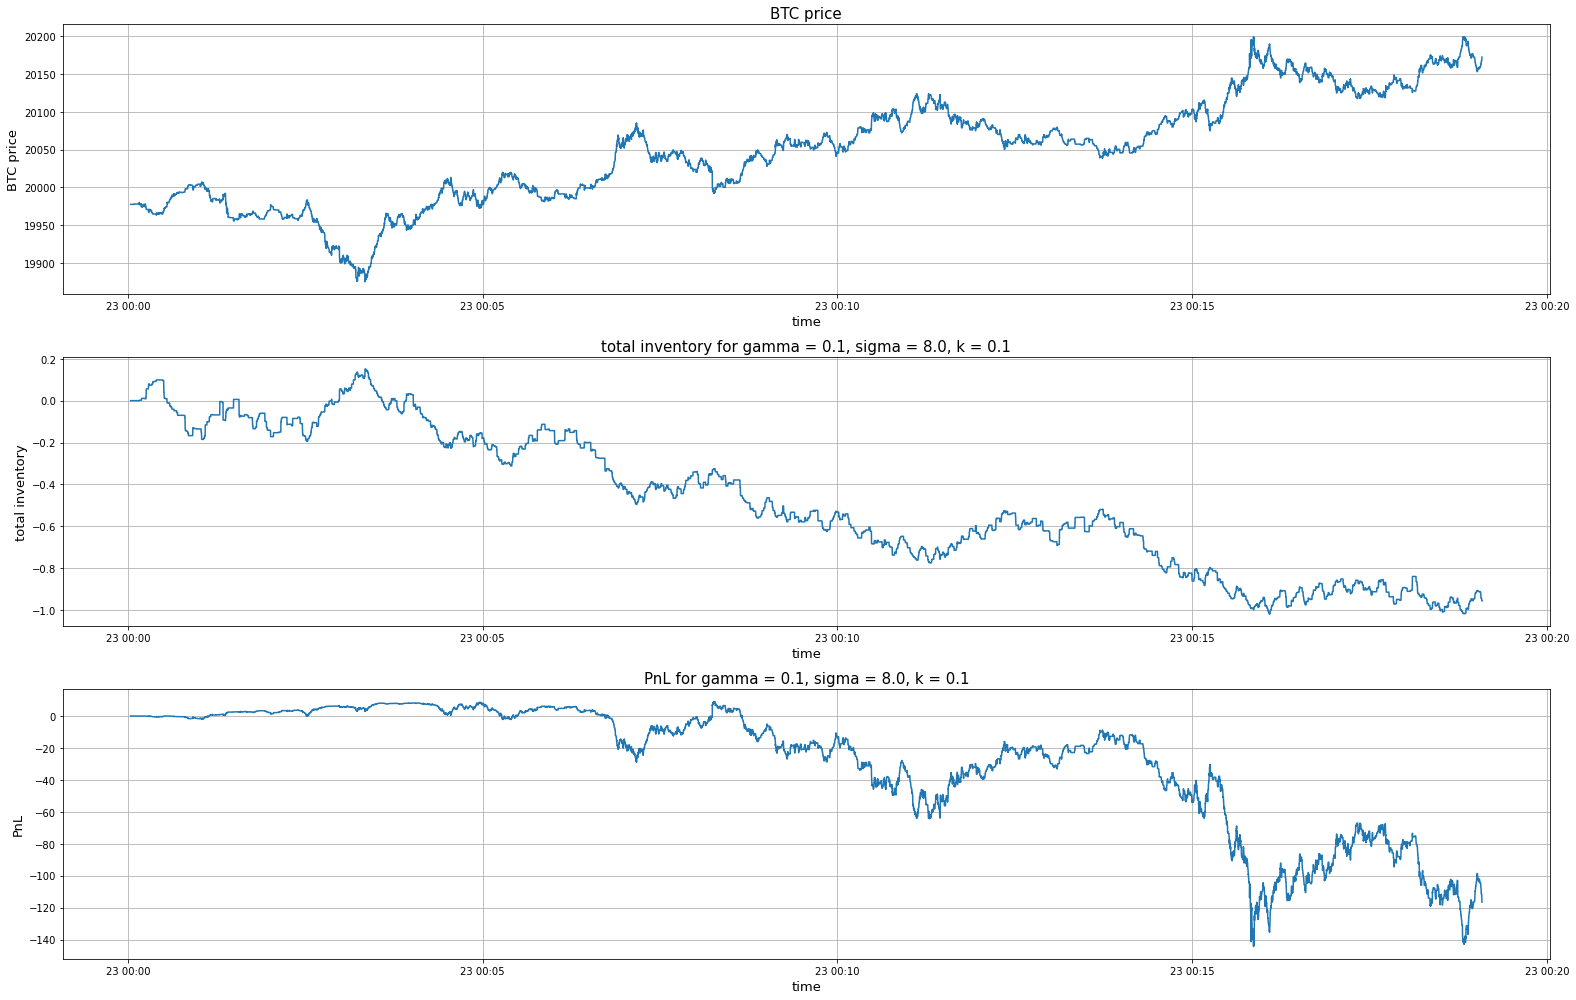

In [176]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.1, sigma = 8.0, k = 0.1", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.1, sigma = 8.0, k = 0.1", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

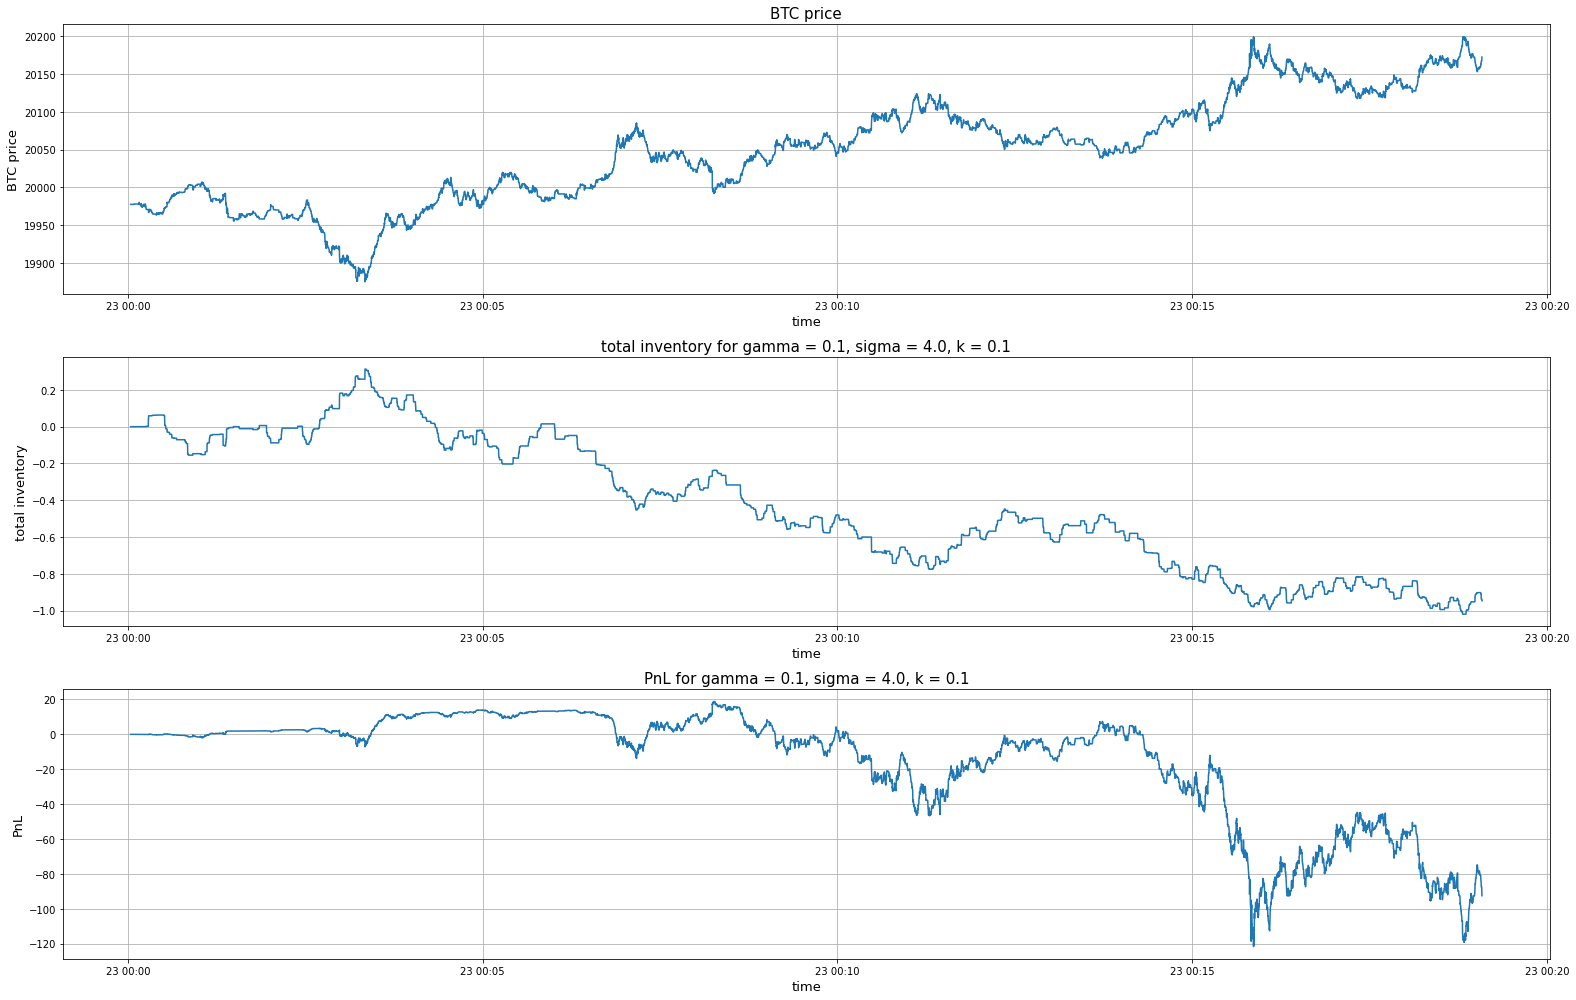

In [177]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.1, sigma = 4.0, k = 0.1", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.1, sigma = 4.0, k = 0.1", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

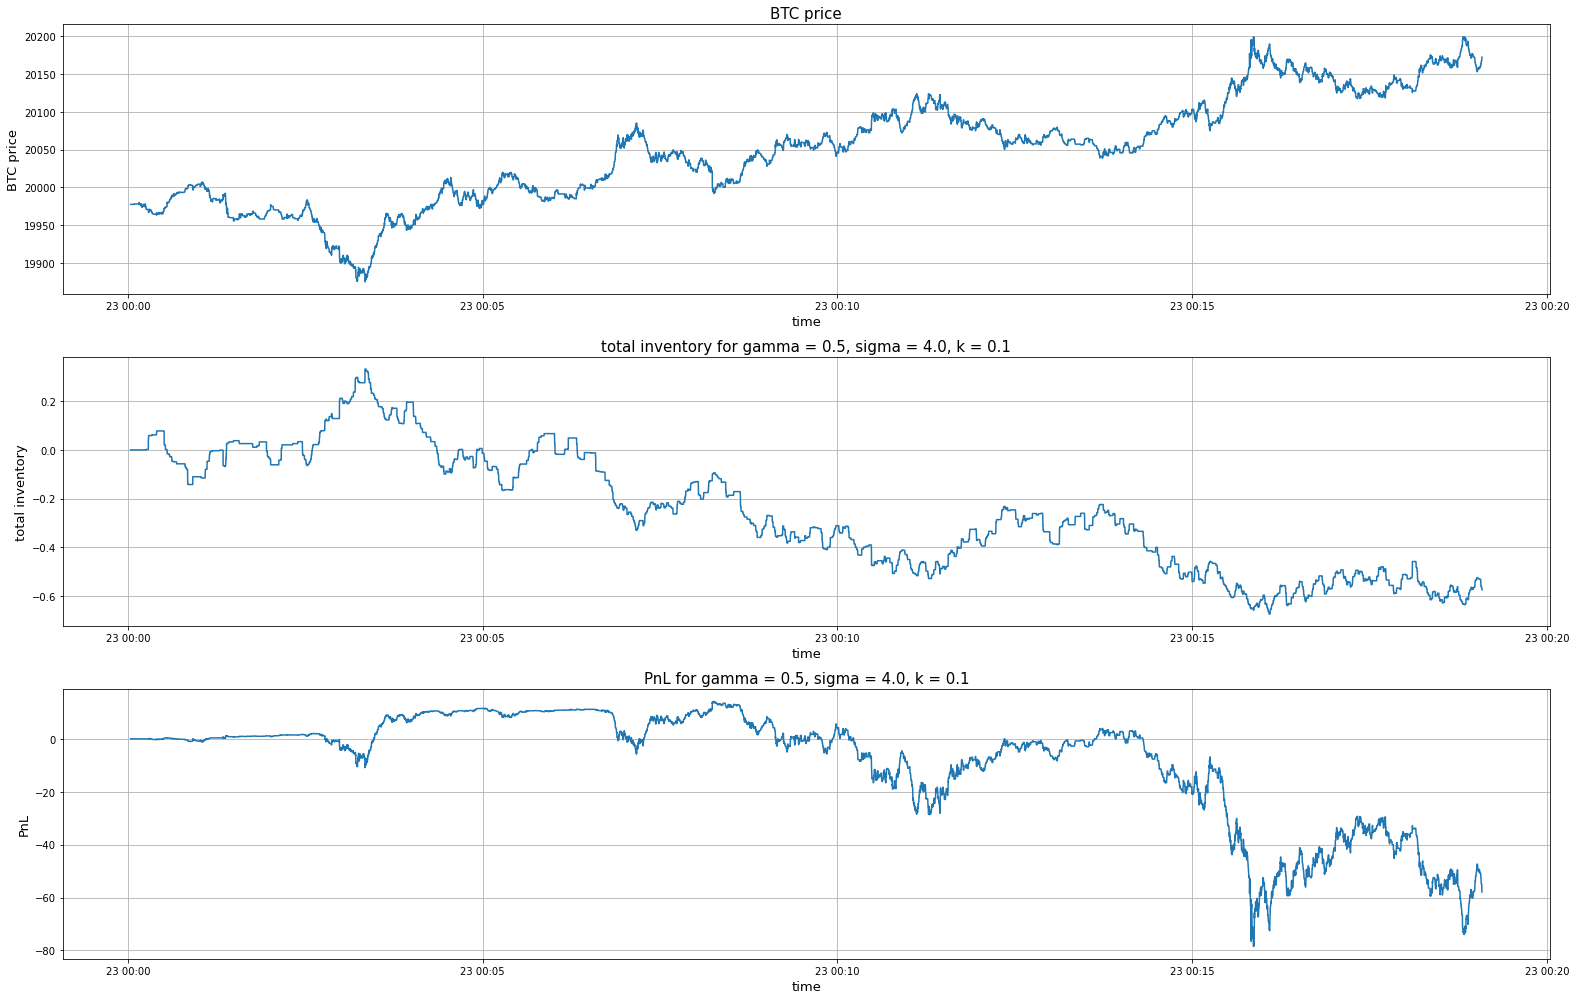

In [178]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.5, sigma = 4.0, k = 0.1", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 4.0, k = 0.1", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

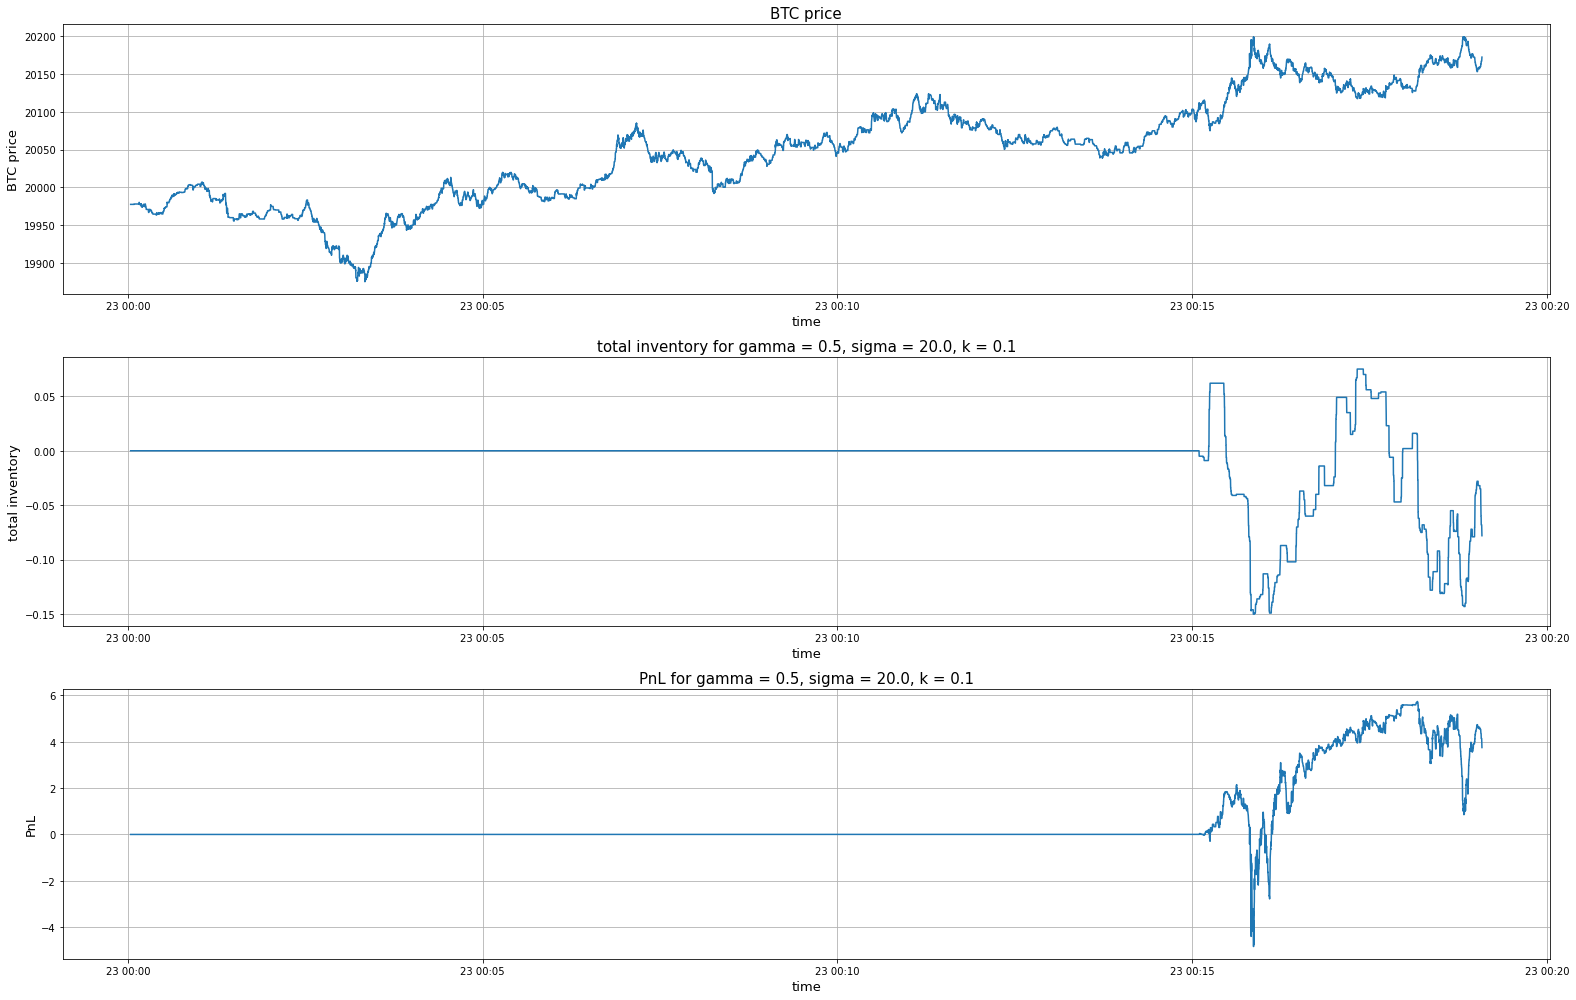

In [179]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.5, sigma = 20.0, k = 0.1", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 20.0, k = 0.1", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

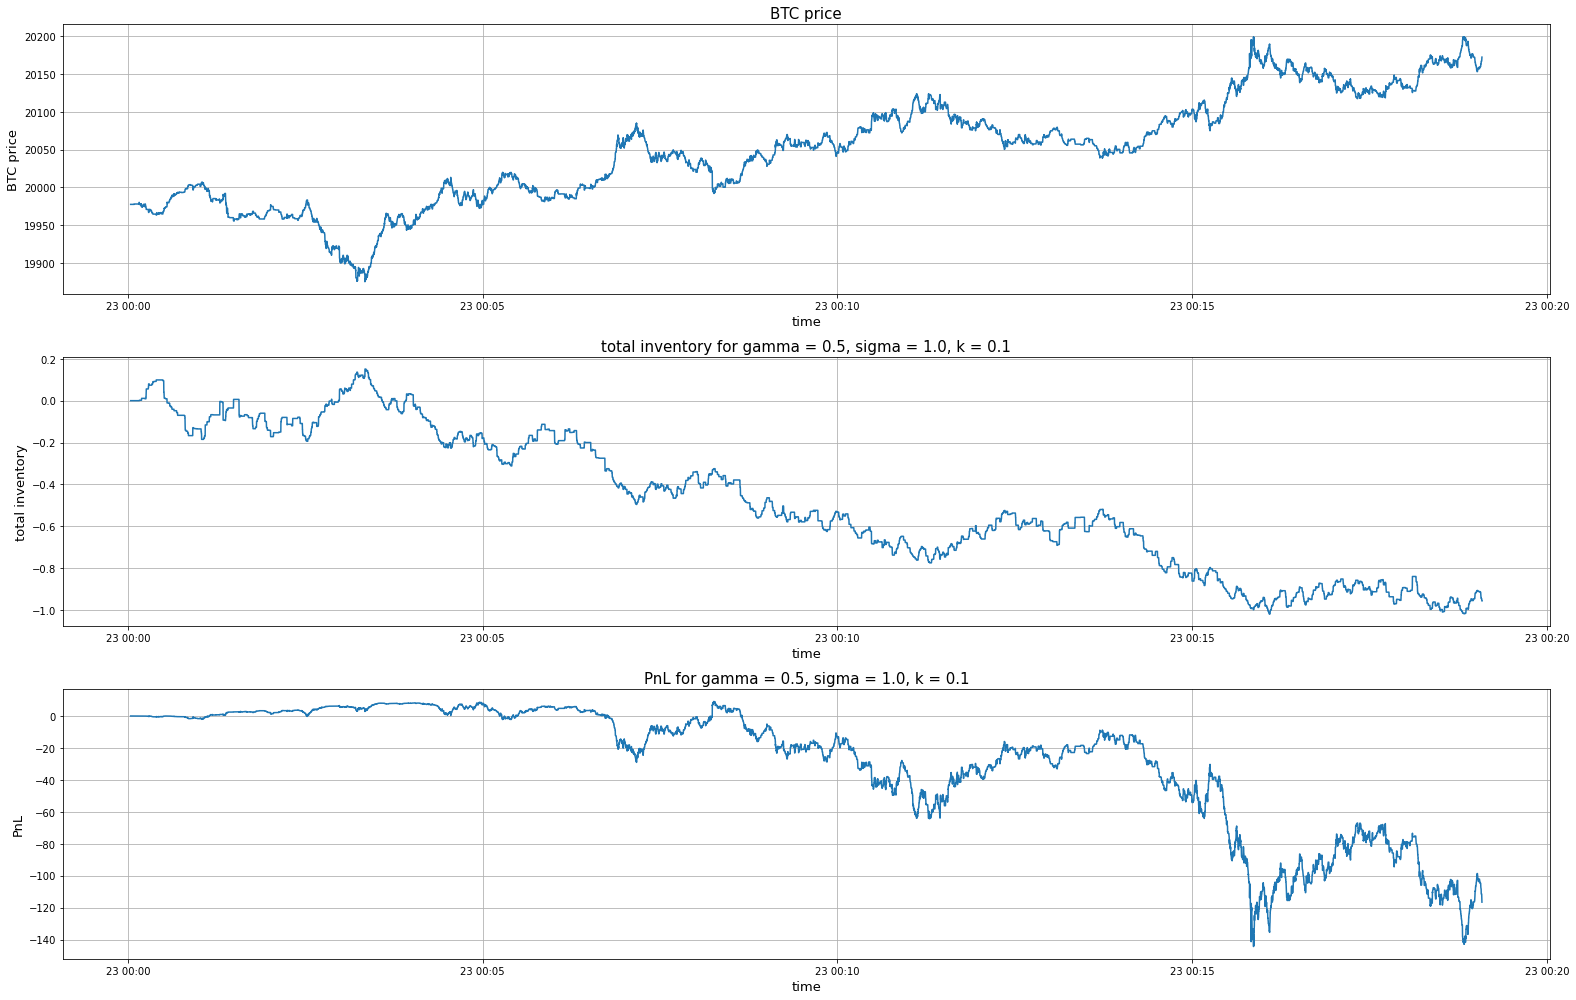

In [180]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.5, sigma = 1.0, k = 0.1", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 1.0, k = 0.1", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

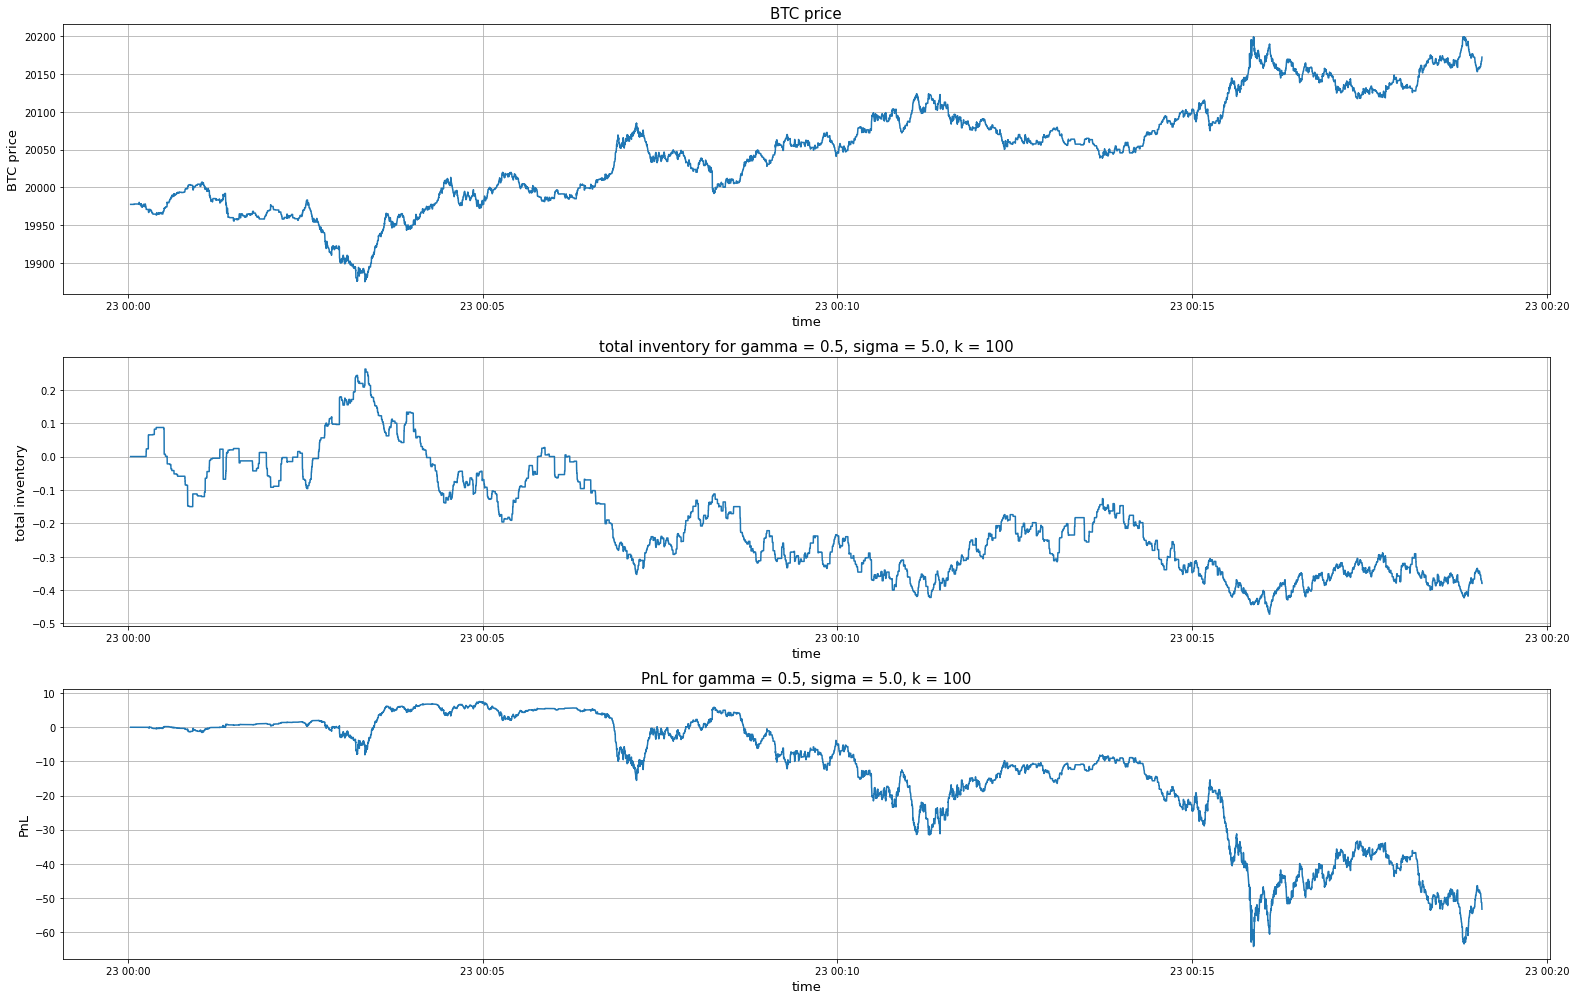

In [181]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.5, sigma = 5.0, k = 100", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 5.0, k = 100", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()

теперь построим графики на большей маркет дате для sigma = 5.0, gamma = 0.5, k = 0.1

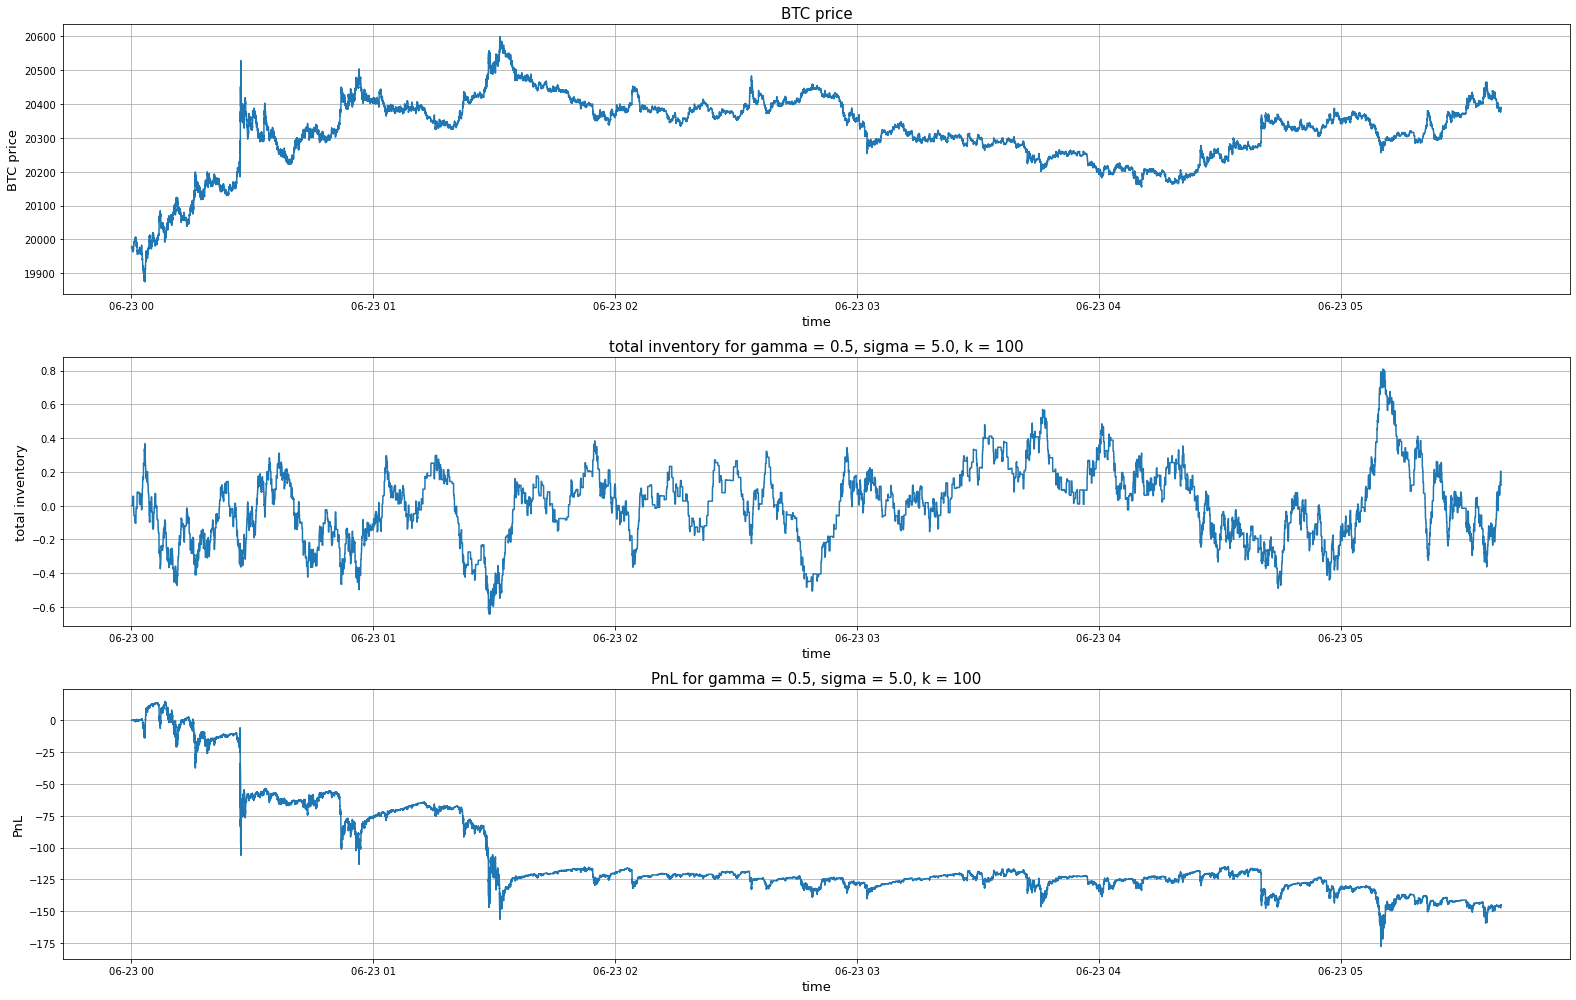

In [188]:
plt.figure(figsize=(22, 14))


plt.subplot(3, 1, 1)
plt.plot(md['receive_ts'], md['ask_price_0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("BTC price", fontsize=13)
plt.title("BTC price", fontsize=15)
plt.grid()

plt.subplot(3, 1, 2)
q = pd.read_csv('inventory.csv')
q['1'] = pd.to_datetime(q['1'])
plt.plot(q['1'], q['0'], '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("total inventory", fontsize=13)
plt.title("total inventory for gamma = 0.5, sigma = 5.0, k = 100", fontsize=15)
plt.grid()

plt.subplot(3, 1, 3)
df = pd.read_csv('pnl01.csv')
dt = pd.to_datetime(df.receive_ts)
plt.plot(dt, df.total, '-')
plt.xlabel("time", fontsize=13)
plt.ylabel("PnL", fontsize=13)
plt.title("PnL for gamma = 0.5, sigma = 5.0, k = 100", fontsize=15)
plt.grid()

plt.tight_layout()
plt.show()